# We will be exploring different denoising techniques to extract only meaningful features of the image

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [3]:
# !pip install opencv-python

In [4]:
def canny_detector(img,sigma=0.3):
    v=np.median(img)
    lower=int(max(0,1.0-sigma)*v)
    upper=int(min(255,(1.0+sigma)*v))
    edges=cv.Canny(img,lower,upper)
    return edges

In [5]:
def show(img,msg,gray=True):
    print(msg)
    if gray:
        plt.imshow(img,cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

In [6]:
INPUT_PATH='image.jpg' 

Original


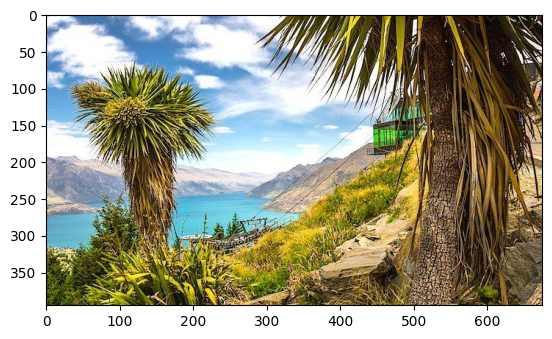

In [7]:
img=cv.imread(INPUT_PATH) ##By default read in BGR format
img= cv.cvtColor(img, cv.COLOR_BGR2RGB)

show(img,"Original",False)


# Gray Scale Image

Gray Scale Image


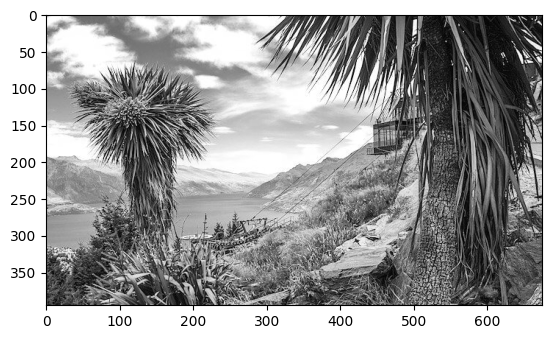

In [8]:
gray_scale=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
show(gray_scale,"Gray Scale Image")

# Denoising Techniques

## 1.Gaussian Blur

Gaussian Blur


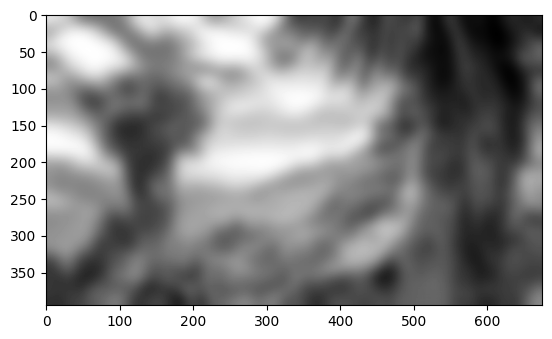

In [9]:
gaussian_blur=cv.GaussianBlur(gray_scale,(0,0),sigmaX=10,sigmaY=10)
show(gaussian_blur,"Gaussian Blur")

## 2.Divide Image 

Divide Image


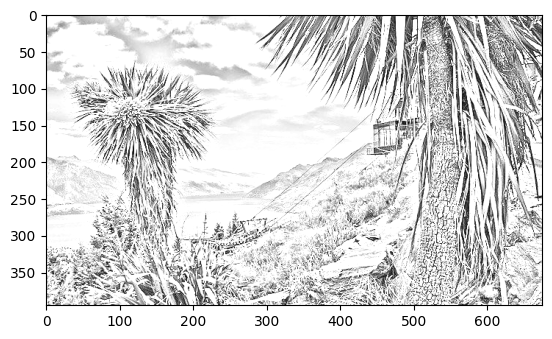

In [10]:
divide_img=cv.divide(gray_scale,gaussian_blur,scale=255)
show(divide_img,"Divide Image")

## 3. OTSU Thresholding

Otsu thresholding


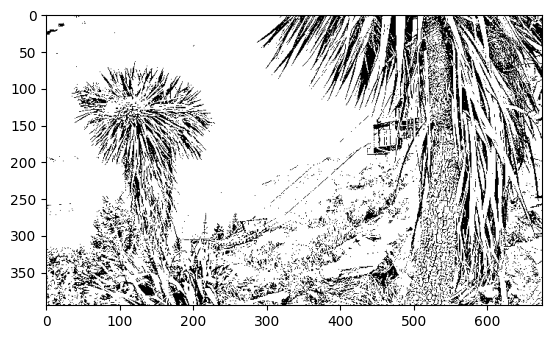

In [11]:
otsu_threshold=cv.threshold(divide_img,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
show(otsu_threshold,"Otsu thresholding")

## 4. Morphology Image

Morphology Image


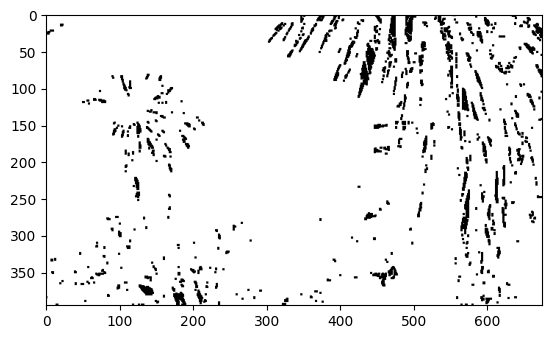

In [12]:
kernel=cv.getStructuringElement(cv.MORPH_RECT,(3,3))
morph_img=cv.morphologyEx(otsu_threshold,cv.MORPH_CLOSE,kernel)  #MORPH_CLOSE do first dilation then erosion
                                                                # MORPH_OPEN do erosion then dilation
show(morph_img,"Morphology Image")

# Effect on feature detection (Edge Detector)

## 1. Gray Scale Image

Canny detector on Gray Scale Image


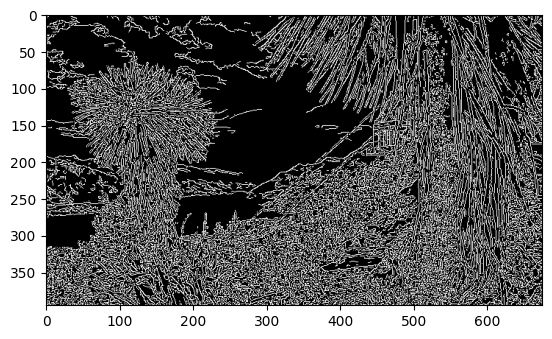

In [13]:
canny_gray=canny_detector(gray_scale)
show(canny_gray,"Canny detector on Gray Scale Image")

## 2. Gaussian Image

Canny detector on Gaussian Blur Image


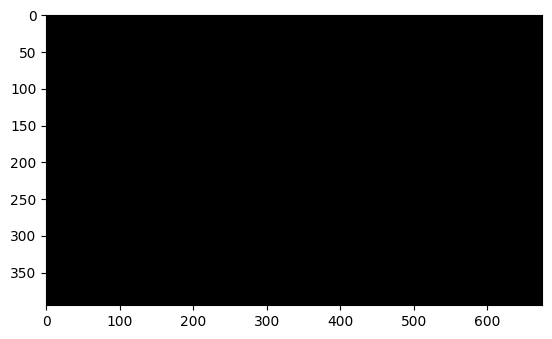

In [14]:
canny_gaussian_blur=canny_detector(gaussian_blur)
show(canny_gaussian_blur,"Canny detector on Gaussian Blur Image")

# 3. Divide Image

Canny detector on divide Image


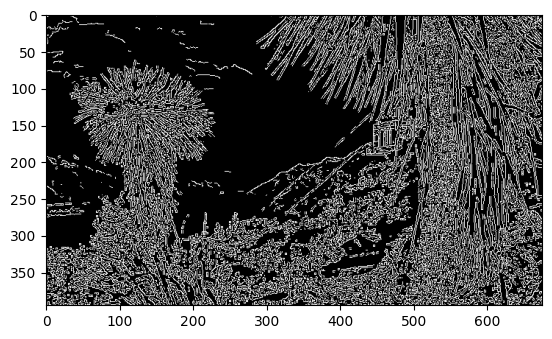

In [15]:
canny_divide=canny_detector(divide_img)
show(canny_divide,"Canny detector on divide Image")

## 4. OTSU Image

Canny detector on Otsu Image


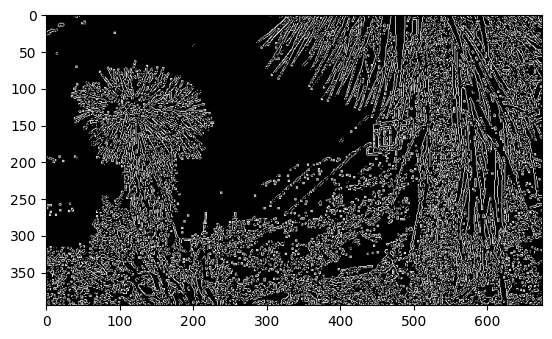

In [16]:
canny_otsu=canny_detector(otsu_threshold)
show(canny_otsu,"Canny detector on Otsu Image")

## 5. Morphed Image

Canny detector on Morphed Image


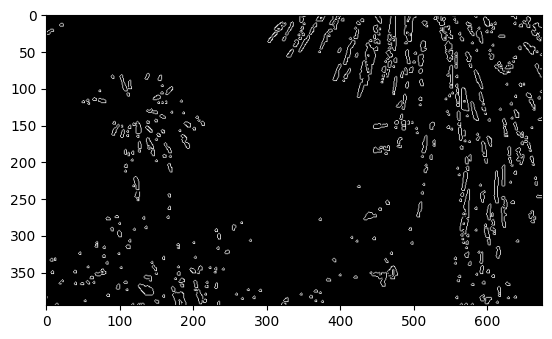

In [17]:
canny_morphed=canny_detector(morph_img)
show(canny_morphed,"Canny detector on Morphed Image")